In [1]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt

C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = pd.read_csv(r"D:\Mas Yugo\Data Dummy Power Consumption (2014 - 2018) FIXXX.csv")

In [3]:
#Baca dataset
data['ds'] = data['Datetime']
data['y'] = data['Energy (WH)']

#print(data['ds'])

In [4]:
#Model
model = Prophet()
model.fit(data)

19:39:43 - cmdstanpy - INFO - Chain [1] start processing
19:39:59 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
#Forecasting

future = model.make_future_dataframe(periods=365, freq='60min')
#future.tail()


In [20]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
44178,2019-01-16 00:00:00,29434.760259,23545.518755,35571.852958
44179,2019-01-16 01:00:00,29758.509432,23660.838840,35804.738623
44180,2019-01-16 02:00:00,30364.096066,24652.868273,36546.301633
44181,2019-01-16 03:00:00,31173.866212,24539.811048,36825.150227
44182,2019-01-16 04:00:00,32097.392603,25983.256797,38187.348523


C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Andreas Sahir\AppData\Local\anaconda3\envs\forecasting\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future versi

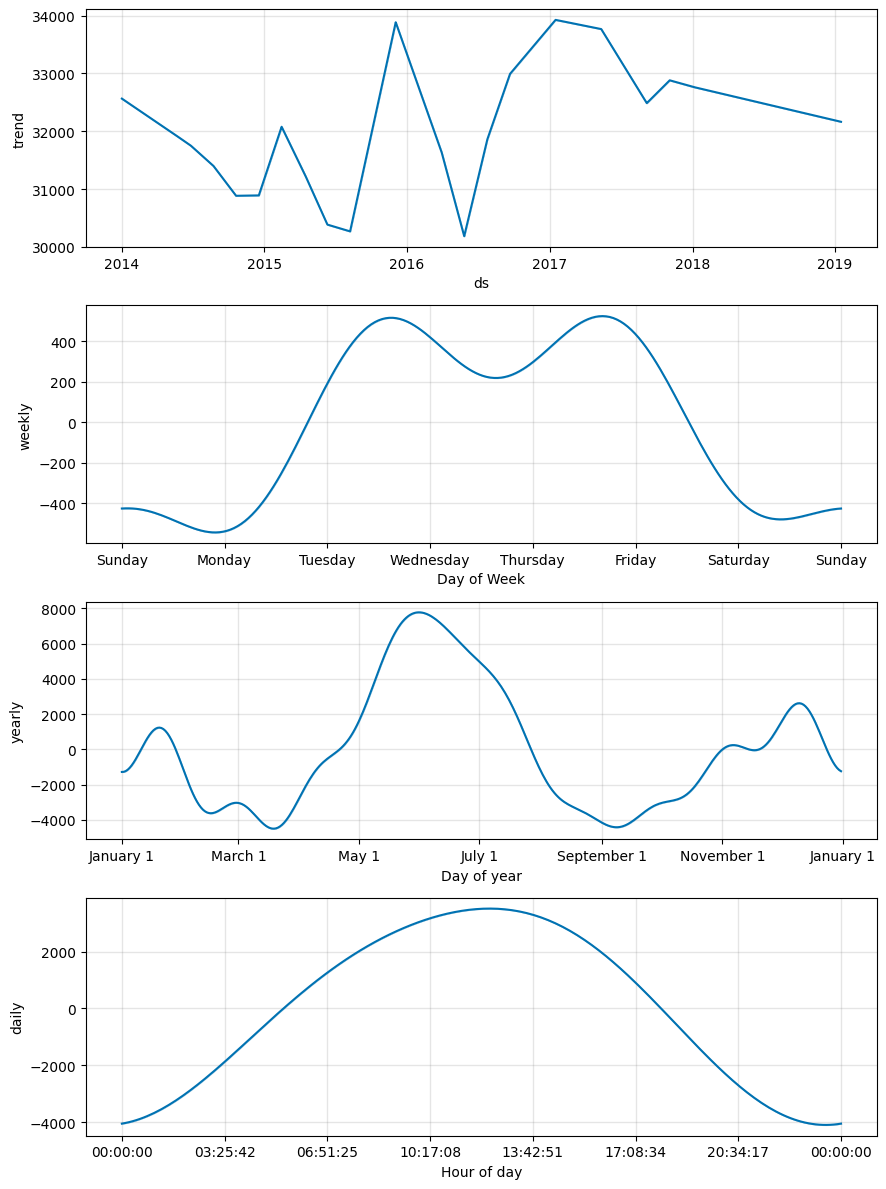

In [22]:
plot = model.plot_components(forecast)